In [1]:
import pytesseract as tess
from pytesseract import Output
import numpy as np
import pandas as pd
import cv2

import matplotlib.pyplot as plt

In [4]:
img = cv2.imread('1648479876203.jpg')

tess.pytesseract.tesseract_cmd = r'C:/Users/Deepesh/AppData/Local/Programs/Tesseract-OCR/tesseract.exe'
text = tess.pytesseract.image_to_string(img)
print(text)

In [3]:
type(text)

str

In [5]:
print(tess.image_to_data(img))

level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	1080	1080	-1	
2	1	1	0	0	0	38	354	988	180	-1	
3	1	1	1	0	0	38	354	988	180	-1	
4	1	1	1	1	0	38	354	988	42	-1	
5	1	1	1	1	1	38	355	25	31	94.812607	A
5	1	1	1	1	2	76	356	75	30	94.812607	true
5	1	1	1	1	3	165	354	106	32	96.428391	friend
5	1	1	1	1	4	288	355	26	31	96.337708	is
5	1	1	1	1	5	328	363	172	23	96.464417	someone
5	1	1	1	1	6	514	354	78	32	95.656021	who
5	1	1	1	1	7	609	354	62	32	96.266190	has
5	1	1	1	1	8	685	354	60	32	96.266190	the
5	1	1	1	1	9	760	363	146	33	96.302498	courage
5	1	1	1	1	10	919	356	37	30	96.302498	to
5	1	1	1	1	11	969	354	57	32	94.711868	tell
4	1	1	1	2	0	39	423	975	42	-1	
5	1	1	1	2	1	39	432	64	33	95.955521	you
5	1	1	1	2	2	118	423	95	32	95.955521	what
5	1	1	1	2	3	227	423	68	32	96.098198	shit
5	1	1	1	2	4	309	432	64	33	96.098198	you
5	1	1	1	2	5	388	432	65	29	96.291344	are,
5	1	1	1	2	6	469	423	66	32	96.928497	and
5	1	1	1	2	7	551	423	63	32	96.973152	still
5	1	1	1	2	8	631	423	42	32	96.

In [6]:
image_data = tess.image_to_data(img, output_type= Output.DATAFRAME)

image_data = pd.DataFrame(image_data)

In [7]:
image_data

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,1080,1080,-1.000000,NaN
1,2,1,1,0,0,0,38,354,988,180,-1.000000,NaN
2,3,1,1,1,0,0,38,354,988,180,-1.000000,NaN
3,4,1,1,1,1,0,38,354,988,42,-1.000000,NaN
4,5,1,1,1,1,1,38,355,25,31,94.812607,A
5,5,1,1,1,1,2,76,356,75,30,94.812607,true
6,5,1,1,1,1,3,165,354,106,32,96.428391,friend
7,5,1,1,1,1,4,288,355,26,31,96.337708,is
8,5,1,1,1,1,5,328,363,172,23,96.464417,someone
9,5,1,1,1,1,6,514,354,78,32,95.656021,who


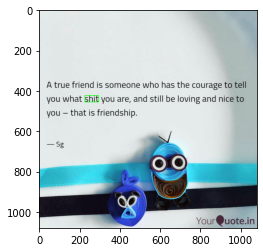

In [8]:
bad_words = pd.read_csv('bad-words.csv')
# bad_words = ['apple', 'banana', 'quick', 'lazy','table','shit']

output = image_data.text

for word in bad_words['jigaboo']:
    for i in output:
        if word == i:
            corr = image_data[image_data["text"]== i][["left","top","width","height"]]   
            x = int(corr['left'])
            y = int(corr['top'])
            w = int(corr['width'])
            h = int(corr['height'])
            position_of_badword = cv2.rectangle(img.copy(), (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(position_of_badword)

True

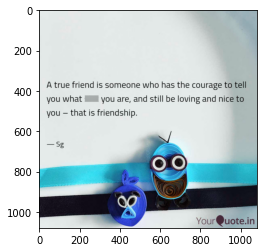

In [9]:
bad_words = pd.read_csv('bad-words.csv')
# bad_words = ['apple', 'banana', 'quick', 'lazy','table','shit']

output = image_data.text

for word in bad_words['jigaboo']:
    for i in output:
        if word == i:
            corr = image_data[image_data["text"]== i][["left","top","width","height"]]   
            x = int(corr['left'])
            y = int(corr['top'])
            w = int(corr['width'])
            h = int(corr['height'])
            clean_image = cv2.GaussianBlur(img[y:y+h, x:x+w],(149,149),0)
            img[y:y+h, x:x+w] = clean_image
plt.imshow(img)
cv2.imwrite("output_image/image.png",img)